In [777]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

df = pd.read_csv('stud_math.csv')

df.info()

# Создадим функцию для вывода интересующей информации.
def display_data(column):
    display(pd.DataFrame(column.value_counts()))
    print("Значений, встретившихся в столбце более 10 раз:", (column.value_counts()>10).sum())
    print("Уникальных значений:", column.nunique())
    print("Количество пропусков:", column.isnull().sum())
    pd.DataFrame(column).info()

# Для боксплота.
def get_boxplot(a,column):
    fig, ax = plt.subplots(figsize = (a, 4))
    sns.boxplot(x=column, y='score', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

# Для p-test
def get_stat_dif(a,column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= a/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

# Итак:
Столбцов много :-(
Числовых столбцов - 13. age, medu, fedu, traveltime, studytime, failures, (studytime, granular),
famrel, freetime, goout, health, abscences, score (целевая). 
Однако именно числовых всего - age, abscences и score. Failures я бы отнес и туда и туда, так как она до 3 числовая, далее категориальная. Остальные категориальные, уже переведенные в числа.
Строковые - (логично) все остальные - 17. 

Почти все переменные - номинативные. При рассмотрении каждого параметра, сразу оценим их визуально на основе boxplot, иначе в конце слишком много сразу смотреть. Плюс в завершении все-равно проверим все данные тестом Стьюдента.

Сразу удивляет, что в датасете 30 параметров, в описании задания на платформе 29. Присмотревшись обнаружился числовой  (studytime, granular).
Посмотрим на него, посчитаем корреляцию с просто studytime: получается -1.

Видим, что это одно и то-же. Соответсвенно избавимся от (studytime, granular), чтобы не заморачиваться с этим длинным названием столбца.

In [778]:
print('Корреляция:')
print(df[['studytime','studytime, granular']].corr())
df.drop(['studytime, granular'], axis=1, inplace = True)
print()
df.info()

Корреляция:
                     studytime  studytime, granular
studytime                  1.0                 -1.0
studytime, granular       -1.0                  1.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       378 non-null object
famsize       368 non-null object
Pstatus       350 non-null object
Medu          392 non-null float64
Fedu          371 non-null float64
Mjob          376 non-null object
Fjob          359 non-null object
reason        378 non-null object
guardian      364 non-null object
traveltime    367 non-null float64
studytime     388 non-null float64
failures      373 non-null float64
schoolsup     386 non-null object
famsup        356 non-null object
paid          355 non-null object
activities    381 non-null object
nursery       379 non-null object
higher        375 non-null object
internet

Теперь посмотрим на датасет, что есть что.
# Описание датасета
Посмотрим на переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

# Score

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


Значений, встретившихся в столбце более 10 раз: 12
Уникальных значений: 18
Количество пропусков: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
score    389 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Количество пропусков: 0


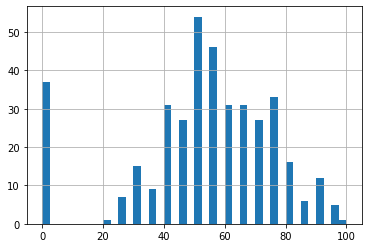

In [779]:
# 29 score — баллы по госэкзамену по математике
# Сразу посмотрим на score, вдруг в нем много пропусков. Если будет так, то строки с пропусками в score как я 
# думаю необходимо будет удалить. Так как заполнять пропуски вцелевой переменной, и после этого обучать модель 
# видится мне не правильным.

# А на основе данных которые мы возможно удалим, мы можем сделать какие либо выводы по признакам в дальнейшем.
display_data(df.score)
display(df.score.describe())

df.dropna(subset=['score'], inplace = True)
print("Количество пропусков:", df.score.isnull().sum())
df.score.hist(bins = 40, range = (0,100))

Пустых значений оказалось не много, всего 6. Эти строки из датфрейма удалены.

В остальном данные варьируются от 0 до 100, тоесть логично сделать вывод, что экзамен оценивался по стобальной шкале. Распределение данных нормальное. Единственное, что смущает это 37 нулевых оценок. И в данном случае сложно сказать, что означает этот 0. Это ошибка при обработке ответов, неявка, реальная оценка 0 или еще что-то. Определенно, я бы уточнил у поставщика данных(заказчика) что это значит перед дальнейшими действиями, ведь если это ошибка, то полученая в результте модель будет "подпорчена" этими 0.

Сейчас, так как возможности этого сделать нет, оставим 0, и продолжим с другими колонками.

# School

,school
GP,344
MS,45


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Количество пропусков: 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
school    389 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


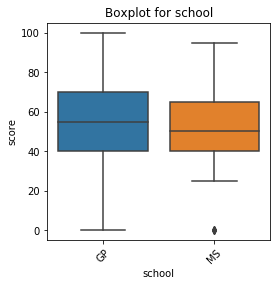

In [780]:
# 1 school — аббревиатура школы, в которой учится ученик

display_data(df.school)

get_boxplot(4,'school')

Насколько видно, в датасете информация по ученикам 2-х школ, пропусков нет. Собственно не так много чего можно сказать.
Отметим для себя, что данных по школе GP гораздо больше, чем по MS. Но пока не понятно важно ли это.

Визуально параметр возможно может влиять на итоговую оценку, но и данных по MS сильно меньше. Проверим в конце.

# Sex

,sex
F,204
M,185


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Количество пропусков: 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
sex    389 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


sex  school
F    GP        179
     MS         25
M    GP        165
     MS         20
Name: school, dtype: int64

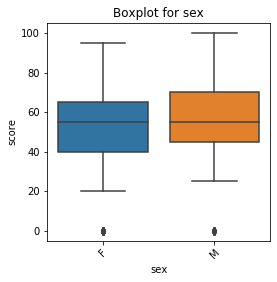

In [781]:
# 2 sex — пол ученика ('F' - женский, 'M' - мужской)

display_data(df.sex)
display(df.groupby('sex').school.value_counts())

get_boxplot(4,'sex')

Полов 2, уже не плохо. Выбросов нет.
Пропусков нет. Почти идеальное распределение по полам, и по выборке по школам.

Думаю можно сказать, что в целом успеваемость учеников мужского пола чуть выше.

# Age

,age
16,103
17,98
15,82
18,80
19,21
20,3
22,1
21,1


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 8
Количество пропусков: 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
age    389 non-null int64
dtypes: int64(1)
memory usage: 6.1 KB


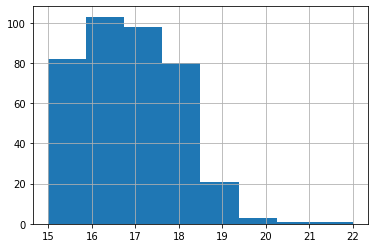

In [782]:
# 3 age — возраст ученика (от 15 до 22)

display_data(df.age)
df.age.hist(bins = 8)

#Числовой признак, боксплот строить не будем. Потом проведем  корреляционный анализ.
# display(df[['age','score']].corr())
# display(pd.DataFrame(df.groupby(['age']).score.median()))

Возрасты - как обещано в задании, от 15 до 22. Правда старше 20 всего 5 человек, но они удовлетворяют условиям. Не вижу причин делать с ними что-то. С другой стороны, это даже лучше как мне кажется, так как чем больше данных для более молодых учеников, тем больше времени будет как-то повлиять на учеников.

Пропусков нет. Оставим как есть.

# Address

,address
U,291
R,83


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Количество пропусков: 15
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
address    374 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


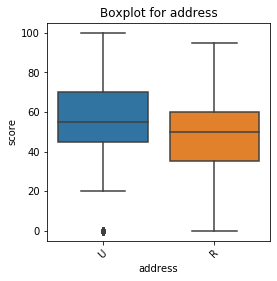

In [783]:
# 4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

display_data(df.address)
get_boxplot(4,'address')

# # 11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 
# #                                   'course' - образовательная программа, 'other' - другое)
# # 13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

# Было исследовано возможное заполнение, на основе признаков traveltime и reason, они по логике 
# показались возможно связанными между собой. Однако было обнаружено, что наверняка на основе этих данных вывод о заполнении 
# не сделать. Так как нормализованные значения соотношений параметров не так сильно отличаются (имеется ввиду, что 
# распределение по полученным группам практически такоеже, как и в принципе распределение самого параметра)

# display(pd.DataFrame(df.groupby(['address','traveltime']).reason.value_counts()))
# df[pd.isnull(df.address)][['traveltime','reason']]

В данных 2 вида адреса, городские (U) и загородные (R). Видно, что городских примерно в 3,5 раза больше. 17 пропусков. Пока не понятно, можно ли их чем-то заполнить. 

В целом оценка у городских выше.
Оставляем.

# Famsize 

,famsize
GT3,255
LE3,107


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Количество пропусков: 27
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
famsize    362 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


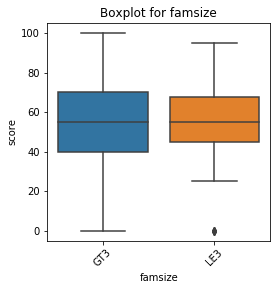

In [784]:
# 5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

display_data(df.famsize)
get_boxplot(4,'famsize')

# Было исследовано возможное заполнение, на основе признаков Pstatus и famrel, они по логике 
# показались возможно связанными между собой. Однако было обнаружено, что наверняка на основе этих данных вывод о заполнении 
# не сделать. Так как нормализованные значения соотношений параметров не так сильно отличаются.

# display(df.groupby(['famsize','famrel']).Pstatus.value_counts())
# df[pd.isnull(df.famsize)][['famrel','Pstatus']]

Снова признак на 2 варианта. Большинство семей имеют более 3 людей, соответсвенно думаю это равносильно тому, что в семье более 1 ребенка. 27 пропусков. 

Пока как заполнить пропуски, и можно ли это сделать не ясно. Оставляем.
Это один из признаков, который хоть и с некоторой натяжкой можно отнести к ранговым на мой взгляд, поэтому его можно будет перевести в бинарный формат.

Визуально параметр не сильно влияет на итоговую оценку. Проверим в конце.

# Pstatus 

,Pstatus
T,308
A,36


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Количество пропусков: 45
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
Pstatus    344 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


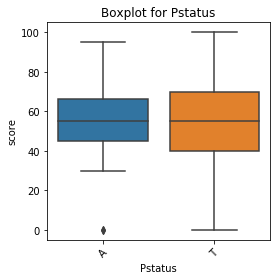

In [785]:
# 6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

display_data(df.Pstatus)
get_boxplot(4,'Pstatus')

#Посмотрим возможные варианты заполнения пропусков. Первое что приходит на ум, связь этого с размером семьи.
#Видим, что встречаются все виды семей(живут отдельно/вместе, семья из 3 и более), и количество всех разновидностей достаточно
# большое. Поэтому на мой взгляд заполнять Pstatus на основе famsize с высокой вероятностью не получится.

# display(df.groupby(['Pstatus']).famsize.value_counts())
# df[pd.isnull(df.Pstatus)].famsize.value_counts()


И снова 2 варианта, жилья родителей Вместе(T) и раздельно (A). Сильное преобладание (Т). Пропусков больше всего, среди признаков в датафрейме - 45, порядка 10 %. Учитывя то, что Т гораздо больще пропуски можно заменить на T, проверим далее на модели. Оставим пока так.

Визуально параметр не сильно влияет на итоговую оценку. Проверим в конце.

# Medu & Fedu

In [786]:
# (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

display_data(df.Medu)
display_data(df.Fedu)

# Видим что явно есть выброс в Fedu - 40. Всего вероятнее это должно было быть 4, нежели что-то другое. Заменим.
df.Fedu.loc[df.Fedu == 40] = 4

,Medu
4.0,131
2.0,100
3.0,96
1.0,56
0.0,3


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 5
Количество пропусков: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
Medu    386 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


,Fedu
2.0,105
3.0,94
4.0,88
1.0,75
0.0,2
40.0,1


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 6
Количество пропусков: 24
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
Fedu    365 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


C:\Users\AZaytsev2\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Medu,0.0,1.0,2.0,3.0,4.0
Fedu,,,,,
0.0,NaN,80.0,NaN,NaN,50.0
1.0,45.0,50.0,50.0,65.0,NaN
2.0,75.0,55.0,55.0,55.0,70.0
3.0,NaN,40.0,55.0,50.0,55.0
4.0,NaN,65.0,60.0,55.0,60.0


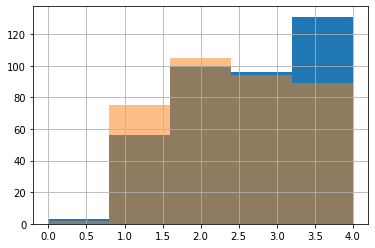

In [787]:
df.Medu.hist(bins = 5)
df.Fedu.hist(bins = 5, alpha = 0.5)
# for col in ['Medu','Fedu']:
#     get_boxplot(6, col)
# Посмотрим, распределение итоговых балов в зависимости от образования родителей. 
display(pd.crosstab(index = df['Fedu'], columns = df['Medu'], values =df.score , aggfunc = 'median'))
# Сильной зависимости я не вижу.

# df[['Fedu','Medu','score']].corr()
# df['Fedu+Medu'] = df.Fedu+df.Medu
# df[['Fedu','Medu','Fedu+Medu','score']].corr()

# display(pd.DataFrame(df.groupby(['Fedu+Medu']).agg({'score':['mean','median']})))

Можем посмотреть сразу на оба признака. Так как они в однотипны.
Распределение равномерное в принципе. Большинство родителей хоть с каким-либо образованием.

Единственый выброс мы убрали. Пропусков не так много, и нет предположений на основе чего мы можем их заполнить. 
Корреляция между Medu и Fedu была оценена. Она положительна и высока, может это подчиняется логике, в том смысле, что более образованные более вероятно общаются/имеют отношения с примерно своим кругом. В этом ключе, возможно будет иметь смысл заменить оба признака комбинацией этих (сумма например). Оставим на будущее это предположение (можно было бы оценить после построения модели и проведения p-Test).

# Mjob & Fjob

,Mjob
other,127
services,98
at_home,58
teacher,55
health,32


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5
Количество пропусков: 19
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
Mjob    370 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


,Fjob
other,194
services,99
teacher,29
at_home,16
health,15


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5
Количество пропусков: 36
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
Fjob    353 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


Fjob,at_home,health,other,services,teacher
Mjob,,,,,
at_home,5,2,29,14,2
health,0,3,16,6,1
other,4,2,85,19,6
services,4,4,32,40,8
teacher,2,4,20,16,11


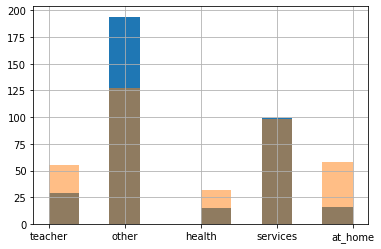

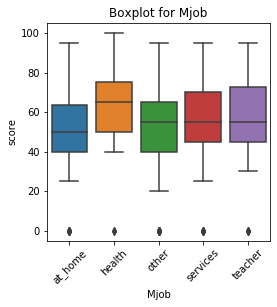

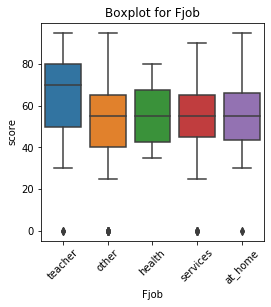

In [788]:
#  ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

display_data(df.Mjob)
display_data(df.Fjob)

display(pd.crosstab(df['Mjob'], df['Fjob']))

df.Fjob.hist()
df.Mjob.hist(alpha=0.5)

# df.Mjob = df.Mjob.astype(str).apply(lambda x: None if x.strip() == '' else x)
# df.Fjob = df.Fjob.astype(str).apply(lambda x: None if x.strip() == '' else x)

# df.Mjob = df.Mjob.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
#                       else x if '(' not in x else x[:x.find('(')].strip())
# df.Fjob = df.Fjob.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
#                       else x if '(' not in x else x[:x.find('(')].strip())

for col in ['Mjob','Fjob']:
    get_boxplot(4, col)

Также рассмотрим оба признака совместно. Выбросов (ошибок в написании профессии) нет.

Оба имеют не очень много пропусков, и в каждой категории достаточно много значений, чтобы была возможность пропуски как-то заполнить. Не пришло на ум на основе какого признака можно заполнять. 
At_home для матерей больше чем для отцов, что наверное логично. В остальном достаточно нормально распределено.

Визуально параметр Mjob может влияет на итоговую оценку больше, чем Fjob. Проверим в конце.

# Reason

,reason
course,135
reputation,102
home,101
other,34


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 4
Количество пропусков: 17
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
reason    372 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


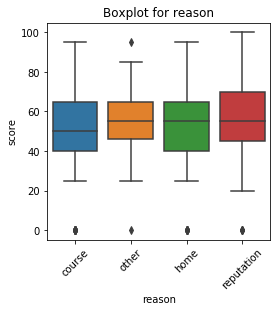

In [789]:
# 11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы,
#                                   'course' - образовательная программа, 'other' - другое)
display_data(df.reason)
get_boxplot(4,'reason')
# display(df.groupby(['reason']).agg({'score':['mean','median']}))
# display(pd.DataFrame(df.groupby(['reason']).traveltime.value_counts()))
# display(df.groupby(['reason','traveltime']).agg({'score':['mean','median']}))
# df[pd.isnull(df.reason)].traveltime

Выбросов нет. Пропусков не много. Распределено достаточно равномерно. Соответсвенно просто заполнить пропуски не получится.
Была проверена возможность заполнить на основе traveltime, однако большинство пустых имеет в traveltime  - 1. Такого значения много в каждой категории, соответственно также не поможет.

Оставим как есть. 

Визуально параметр не сильно влияет на итоговую оценку. Проверим в конце.

# Guardian

,guardian
mother,248
father,86
other,24


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
Количество пропусков: 31
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
guardian    358 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


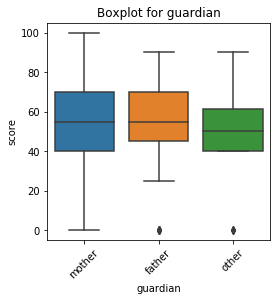

In [790]:
# 12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

display_data(df.guardian)
get_boxplot(4,'guardian')

# df.groupby(['guardian']).agg({'score':['median','mean']})
# display(pd.crosstab(df['guardian'], df['Pstatus']))
# df[pd.isnull(df.guardian)].Pstatus

Выбросов нет. Что именно подразумевается под опекуном не до конца понятно. Когда родители живут не вместо, то вероятнее всего того, с кем остался ребенок. Однако в плане того, что это значит при совместном проживании можно лишь предполагать. Например "главный" контакт для школы, итп.
Почти для всех пропусков статус семьи - проживают вместе. Однока и для проживающих вместе все варианты опекуна существуют (с преобладанием матерей). Поэтому однозначно заполнить пропуски на основе этих данных не получится. При построении модели можно будет протестировать заполнение самым часто встречающимся - mother или всех отнести в other. А возможно, этот параметр и вовсе не сильно влияет на итоговый результат.

Визуально параметр не сильно влияет на итоговую оценку (выборка по other не большая). Проверим в конце.

# Traveltime 

,traveltime
1.0,239
2.0,94
3.0,21
4.0,7


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 4
Количество пропусков: 28
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
traveltime    361 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


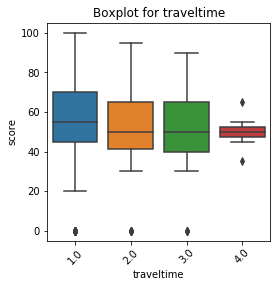

In [791]:
# 13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

display_data(df.traveltime)
get_boxplot(4,'traveltime')

# display(df.groupby(['traveltime','address']).reason.value_counts())
# df[pd.isnull(df.traveltime)].reason

28 пропусков. Большинство детей добираются менее 15 минут. И более 60 всего 7 человек. 

Пока как заполнить пропуски не понятно. Уже в принципе было рассказано в признаках address и reason. Снова можно самым распространенным - 1. Оставляем.

Визуально параметр влияет на итоговую оценку. Проверим в конце.

# Studytime 

,studytime
2.0,189
1.0,103
3.0,63
4.0,27


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 4
Количество пропусков: 7
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
studytime    382 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


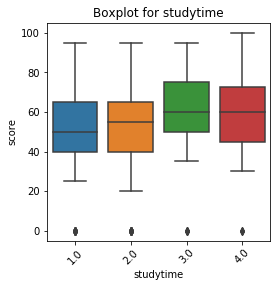

In [792]:
# 14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

display_data(df.studytime)
get_boxplot(4,'studytime')

# display(df.groupby(['studytime']).agg({'score':['median','mean']}))
# df[['traveltime','studytime','score']].corr()

Выбросов нет. Пропусков 8. Как заполнить пропуски не ясно.

Визуально признак важный и может быть связан с итоговым баллом (по боксплоту есть заметные различия). Посмотрим далее.

# Failures 

,failures
0.0,290
1.0,48
2.0,15
3.0,14


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 4
Количество пропусков: 22
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
failures    367 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


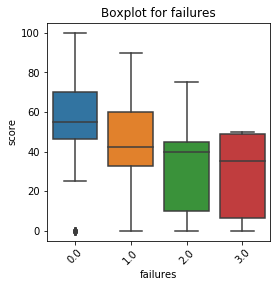

In [793]:
# 15 failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4)

display_data(df.failures)
# В данных значения от 0 до 3, хотя по условиям 1-4. Однако, на мой взгляд ошибка в описании данных, так как во-первых 
# изначально предполагается, что минимум 1 неудача, что на мой взгляд не логично. В последствии в Slack было подтверждено, что
# в условии ошибка.
get_boxplot(4,'failures')

Выбросов нет. Пропусков 22. Как заполнить пропуски не ясно. Больше всего 0, поэтому можно будет попытаться заполнить их 0, проверим это на этапе построения модели.

Визуально признак важный и может быть связан с итоговым баллом (по боксплоту есть заметные различия). Посмотрим далее.

# Schoolsup 

,schoolsup
no,331
yes,49


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Количество пропусков: 9
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
schoolsup    380 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


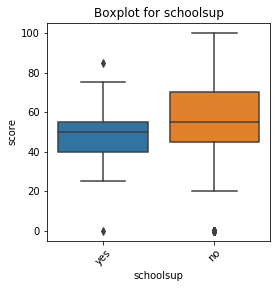

In [794]:
# 16 schoolsup — дополнительная образовательная поддержка (yes или no)

display_data(df.schoolsup)
get_boxplot(4,'schoolsup')

Выбросов нет. Пропусков 9. Как заполнить пропуски не ясно, как вариант можно их заполнить "no", так как в принципе их гораздо больше в датасете. Проверим при построении модели.

Визуально параметр влияет на итоговую оценку. Проверим в конце.

Заменим признак на 0/1.

# Famsup

,famsup
yes,216
no,135


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Количество пропусков: 38
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
famsup    351 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


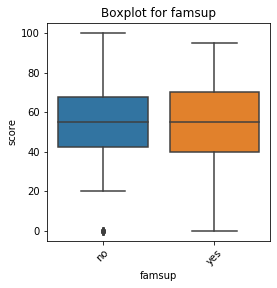

In [795]:
# 17 famsup — семейная образовательная поддержка (yes или no)

display_data(df.famsup)
get_boxplot(4,'famsup')

Выбросов нет. Пропусков 38. Как заполнить пропуски не ясно. Распределение более менее равномерное.

Визуально параметр не сильно влияет на итоговую оценку. Проверим в конце.

Заменим признак на 0/1.

# Paid 

,paid
no,197
yes,153


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Количество пропусков: 39
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
paid    350 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


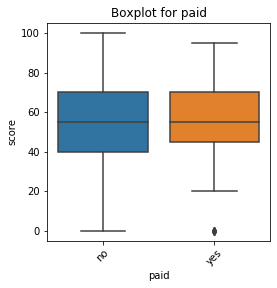

In [796]:
# 18 paid — дополнительные платные занятия по математике (yes или no)

display_data(df.paid)
get_boxplot(4,'paid')

Выбросов нет. Пропусков 39. Как заполнить пропуски не ясно. Распределение более менее равномерное.

Визуально параметр не сильно влияет на итоговую оценку. Проверим в конце.

Заменим признак на 0/1.

# Activities 

,activities
yes,192
no,183


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Количество пропусков: 14
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
activities    375 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


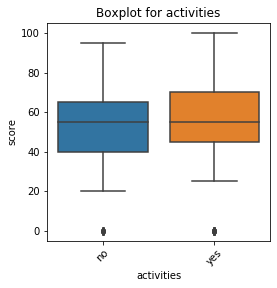

In [797]:
# 19 activities — дополнительные внеучебные занятия (yes или no)

display_data(df.activities)
get_boxplot(4,'activities')

Выбросов нет. Пропусков 14. Как заполнить пропуски не ясно. Распределение более менее равномерное.

Визуально есть небольшая зависимость между параметром и итоговой оценкой. Проверим в конце.

Заменим признак на 0/1.

# Nursery 

,nursery
yes,297
no,77


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Количество пропусков: 15
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
nursery    374 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


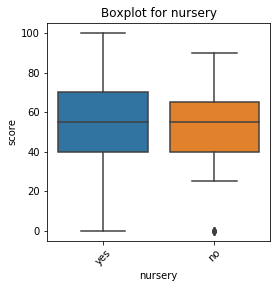

In [798]:
# 20 nursery — посещал детский сад (yes или no)

display_data(df.nursery)
get_boxplot(4,'nursery')

Выбросов нет. Пропусков 15. Как заполнить пропуски не ясно. Распределение более менее равномерное.

Визуально сильной зависимости между параметром и итоговой оценкой не наблюдается. Проверим в конце.

Заменим признак на 0/1.

# Higher 

,higher
yes,350
no,19


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Количество пропусков: 20
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
higher    369 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


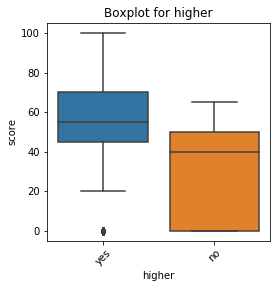

In [799]:
# 21 higher — хочет получить высшее образование (yes или no)

display_data(df.higher)
get_boxplot(4,'higher')

# df[pd.isnull(df.higher)]

Выбросов нет. Пропусков 20. Очень большое преобладание "yes". В принципе можно заменить все пропуски на "yes".

Визуально есть зависимость между параметром и итоговой оценкой. Проверим в конце.

Заменим признак на 0/1.

# Internet 

,internet
yes,300
no,55


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Количество пропусков: 34
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
internet    355 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


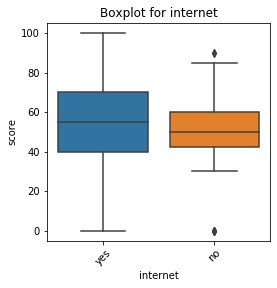

In [800]:
# 22 internet — наличие интернета дома (yes или no)

display_data(df.internet)
get_boxplot(4,'internet')

Выбросов нет. Пропусков 20. Большое преобладание "yes". Признаков на основе чего можно заполнить на ум не приходят. Можно будет попробовать заменить на "yes" - проверим на модели.

Визуально есть небольшая зависимость между параметром и итоговой оценкой. Проверим в конце.

Заменим признак на 0/1.

# Romantic 

,romantic
no,235
yes,123


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Количество пропусков: 31
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
romantic    358 non-null object
dtypes: object(1)
memory usage: 6.1+ KB


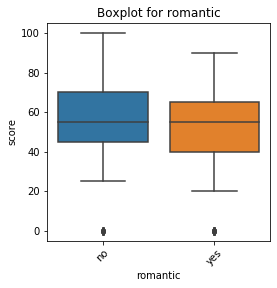

In [801]:
# 23 romantic — в романтических отношениях (yes или no)

display_data(df.romantic)
get_boxplot(4,'romantic')

Выбросов нет. Пропусков 31. Большое преобладание "yes". Признаков на основе чего можно заполнить на ум не приходят. Распределение более менее равномерное.

Визуально есть зависимость между параметром и итоговой оценкой. Проверим в конце.

Заменим признак на 0/1.

# Famrel 

,famrel
4.0,178
5.0,97
3.0,62
2.0,17
1.0,7
-1.0,1


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 6
Количество пропусков: 27
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
famrel    362 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


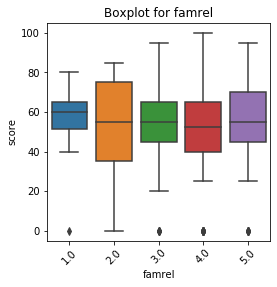

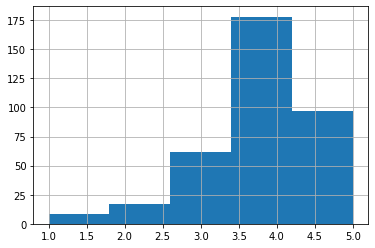

In [802]:
# 24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

display_data(df.famrel)

# Наблюдается 1 выдрос - значение "-1". Можно выбросить эту строку, в принципе потеря одной строки не так важна. 
# Однако, на мой взгляд это скорее оечатка в 1. Можно будет проверить оба варианта в модели. Сейчас замению на 1.
df.famrel = abs(df.famrel)

get_boxplot(4,'famrel')
df.famrel.hist(bins = 5)

Выбросов теперь нет. Пропусков 27. Признаков на основе чего можно заполнить на ум не приходят (уже описано выше было). Распределение более менее равномерное.

Визуально есть зависимость между параметром и итоговой оценкой. Проверим в конце.

# Freetime 

,freetime
3.0,152
4.0,110
2.0,63
5.0,37
1.0,18


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5
Количество пропусков: 9
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
freetime    380 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


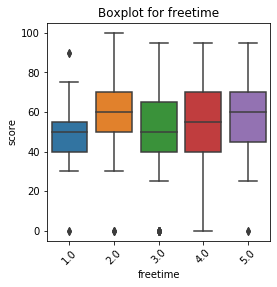

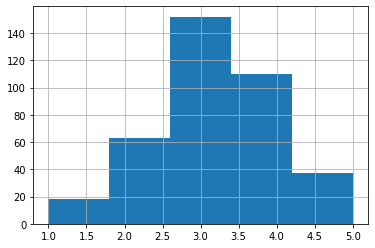

In [803]:
# 25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

display_data(df.freetime)

get_boxplot(4,'freetime')
df.freetime.hist(bins = 5)

Выбросов нет. Пропусков 9. Признаков на основе чего можно заполнить на ум не приходят. Распределение нормальное.

Визуально есть некоторая зависимость между параметром и итоговой оценкой. Проверим в конце.

# Goout

,goout
3.0,126
2.0,101
4.0,81
5.0,51
1.0,23


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5
Количество пропусков: 7
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
goout    382 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


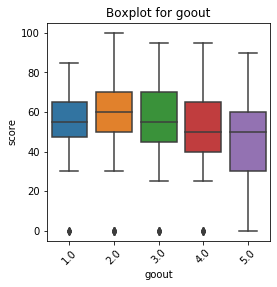

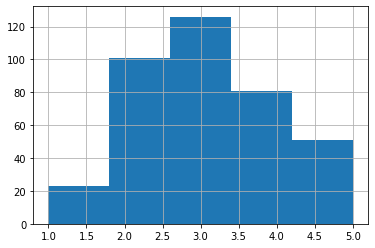

In [804]:
# 26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

display_data(df.goout)

get_boxplot(4,'goout')
df.goout.hist(bins = 5)

Выбросов нет. Пропусков 7. Признаков на основе чего можно заполнить на ум не приходят. Распределение нормальное.

Визуально есть зависимость между параметром и итоговой оценкой. Проверим в конце.

# Health

,health
5.0,137
3.0,88
4.0,60
1.0,47
2.0,42


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5
Количество пропусков: 15
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
health    374 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


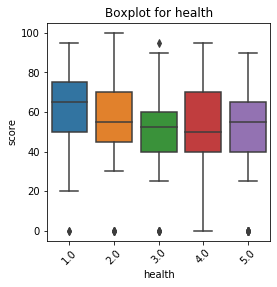

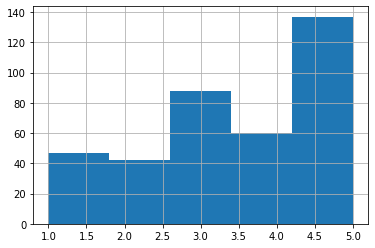

In [805]:
# 27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

display_data(df.health)

get_boxplot(4,'health')
df.health.hist(bins = 5)

Выбросов нет. Пропусков 15. Признаков на основе чего можно заполнить на ум не приходят. Распределение равномерное.

Визуально есть зависимость между параметром и итоговой оценкой. Проверим в конце.

# Absences

,absences
0.0,110
2.0,60
4.0,52
6.0,30
8.0,20
10.0,17
12.0,12
14.0,12
3.0,7
16.0,7


Значений, встретившихся в столбце более 10 раз: 8
Уникальных значений: 36
Количество пропусков: 11
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
absences    378 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


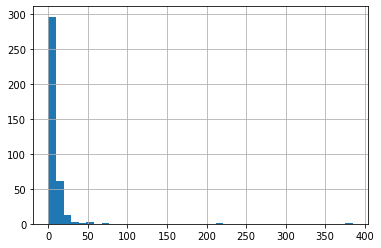

In [806]:
# 28 absences — количество пропущенных занятий

display_data(df.absences)
df.absences.hist(bins = 40)

# Видим, что значений много, но сильно выделяются 2 значения 212 и 385. Многовато пропусков (в описании данных не сказано, за 
# какой период это количество пропусков берется), поэтому начнем с удаления этих значений. Далее посмотрим.
df = df.loc[(df.absences<200) | (df.absences.isnull())]

,absences
0.0,110
2.0,60
4.0,52
6.0,30
8.0,20
10.0,17
14.0,12
12.0,12
3.0,7
16.0,7


Значений, встретившихся в столбце более 10 раз: 8
Уникальных значений: 34
Количество пропусков: 11
<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 394
Data columns (total 1 columns):
absences    376 non-null float64
dtypes: float64(1)
memory usage: 6.0 KB


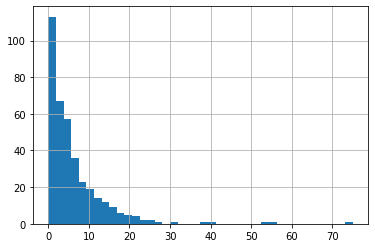

In [807]:
display_data(df.absences)
df.absences.hist(bins = 40)

# Видим, что снова, достаточно длинный "хвост" редких значений. Визуально примерно на 30 на мой взгляд будет логично отсечь.
df = df.loc[(df.absences<=30) | (df.absences.isnull())]

,absences
0.0,110
2.0,60
4.0,52
6.0,30
8.0,20
10.0,17
12.0,12
14.0,12
16.0,7
3.0,7


Значений, встретившихся в столбце более 10 раз: 8
Уникальных значений: 29
Количество пропусков: 11
<class 'pandas.core.frame.DataFrame'>
Int64Index: 382 entries, 0 to 394
Data columns (total 1 columns):
absences    371 non-null float64
dtypes: float64(1)
memory usage: 6.0 KB


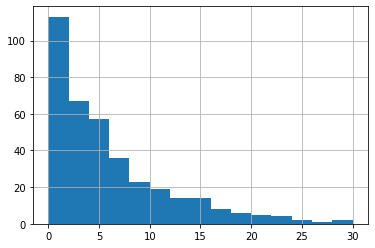

In [808]:
display_data(df.absences)
df.absences.hist(bins = 15)

df.absences.fillna(df.absences.median(), inplace = True)

# Так же была проведена оценка по фильтрованию этого признака по межквартильным расстояниям(согласно учебному материалу).
# Однако, после этого до 20 верхняя граница была сдвинута. Мне кажется, что таким образом, слишком много данных, которые 
# не противоречат логике будут отброшены (14 строк).
# df.loc[df.absences>=20].info()

# perc25 = df.absences.quantile(0.25)
# perc75 = df.absences.quantile(0.75)
# IQR = perc75 - perc25

# print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
#       , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
# df.absences.loc[df.absences.between(perc25-1.5*IQR,perc75+1.5*IQR)].hist(bins = 10)

# df = df.loc[df.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

Выбросов более нет. Пропусков 11. При построении модели потестируем как лучше будет их заполнить. Сейчас заполним медианой. Оставляем признак.

Все признаки просмотрены, перейдем к корреляционному анализу для числовых признаков.

# Корреляционный Анализ

C:\Users\AZaytsev2\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\AZaytsev2\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


,age,absences,failures,score
age,1.000000,0.153723,0.186288,-0.151888
absences,0.153723,1.000000,0.101319,0.065608
failures,0.186288,0.101319,1.000000,-0.345554
score,-0.151888,0.065608,-0.345554,1.000000


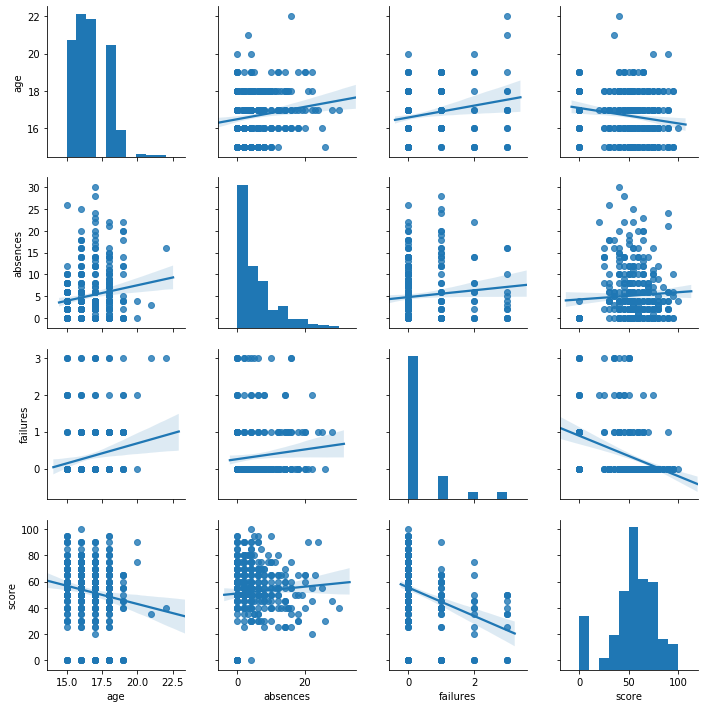

In [809]:
sns.pairplot(df[['age','absences','failures','score']], kind = 'reg')
df[['age','absences','failures','score']].corr()

# sns.pairplot(df[['age','absences','traveltime','studytime','score']], kind = 'reg')
# df[['age','absences','traveltime','studytime','score']].corr()

Была оценена корреляция числовых признаков. Я решил оставитьь все, так как среди нех очень сильной корреляции. Есть небольшая корреляция между возрастом и пропусками (видимо чем старше, тем больше других дел, меньше времени на учебу).

Так же была оценена корреляция с добавлением еще 2-х признаков (studydime, traveltime), которые все-же не совсем числовые, но их можно сравнивать (ранговые, содержат числовой смысл). Однако все равно выбросить на основе этого ничего не надо.

Перейдем к анализу номинативных переменных. В каждом пункте мы уже в принципе смотрели, но теперь взглянем еще раз в общем, и проведем Тест Стьюдента.

# Анализ Номинативных переменных.

In [810]:
nom_df = df.drop(['age','absences','score'], axis=1)

# for col in nom_df:
#     get_boxplot(8,col)

# Подтвердились изначальные выводы. Перейдем к Тесту Стьюдента.

In [812]:
for col in nom_df:
    get_stat_dif(0.05, col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Fedu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки goout


Как мы видим, серьёзно отличаются следующие параметры: sex, address, Medu, Mjob, failures, schoolsup, higher,romantic и  goout. 
Частично это совпадает с нашим визуальным анализом, на основе boxplot, что приятно).

Оставим эти переменные в датасете для дальнейшего построения модели.

Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: age,absences, sex, address, Medu, Mjob, failures, schoolsup, higher, romantic, goout и score.

In [813]:
df_for_model = df.loc[:, ['age','absences', 'sex', 'address', 'Medu', 'Mjob', 'failures',
                          'schoolsup', 'higher', 'romantic', 'goout', 'score']]

df_for_model.head()

,age,absences,sex,address,Medu,Mjob,failures,schoolsup,higher,romantic,goout,score
0,18,6.0,F,U,4.0,at_home,0.0,yes,yes,no,4.0,30.0
1,17,4.0,F,U,1.0,at_home,0.0,no,yes,no,3.0,30.0
2,15,10.0,F,U,1.0,at_home,3.0,yes,yes,NaN,2.0,50.0
3,15,2.0,F,U,4.0,health,0.0,no,yes,yes,2.0,75.0
4,16,4.0,F,U,3.0,other,0.0,no,yes,no,2.0,50.0


# Выводы

Наконец подведем итоги.

Итак, в результате EDA для анализа влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике были получены следующие выводы:

В данных в целом достаточно мало пустых значений.

Числовых параметров мало - age,absences,score. Остальные номинативные.

На этапе осмотра данных был вявлен полностью скоррелированный с другим столбец. Этот столбец исключен.

В целевой переменной score обнаружено много значений 0 - обязательно уточнить у заказчика, что это означает, для последующих выводов.

Опечатки найдены и заменены в столбцах Fedu и Famrel.

Условия параметра failures в описании задачи были ошибочны, в процессе анализа удалось подтвердить с заказчиком, что действительно произошла ошибка, и действовать с правильным пониманием параметра.

Пропуски во многих столбцах можно будет попытаться заполнять на следующем этапе при построении, и оценке модели.

Выбросы найдены только в столбце absences, что позволяет сделать вывод о том, что данные достаточно чистые.

В базе данных много параметров не оказывающих сильного влияния на целевой параметр.

Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели были выбраны на основе Теста Стьюдента, это :  age,absences, sex, address, Medu, Mjob, failures, schoolsup, higher, romantic, goout и score.